In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("Mounting Failed.")

Mounted at /content/gdrive


# import

In [ ]:
import os
import json
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as functional
import torch.utils.data as data
from PIL import Image
from torchvision import datasets
from torchvision.utils import save_image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil
from torchvision.models import vgg16

In [ ]:
class Loader_validation(data.Dataset):
	def __init__(self, path, transform=None):
		self.path = path
		self.dataset = datasets.ImageFolder(path, transform=transform)
		self.length = self.dataset.__len__()
		self.transform = transform
		
	def __getitem__(self, idx):
		data, y_task = self.dataset.__getitem__(idx)
				
		return data, torch.tensor(y_task).long().squeeze()

	def __len__(self):
		return self.length
class Loader_unif_sampling(data.Dataset):
	def __init__(self, path1, path2, path3, transform=None):
		self.path_1 = path1
		self.path_2 = path2
		self.path_3 = path3
		
		self.dataset_1 = datasets.ImageFolder(self.path_1, transform=transform)
		self.dataset_2 = datasets.ImageFolder(self.path_2, transform=transform)
		self.dataset_3 = datasets.ImageFolder(self.path_3, transform=transform)
		
		self.len_1 = self.dataset_1.__len__()
		self.len_2 = self.dataset_2.__len__()
		self.len_3 = self.dataset_3.__len__()
		
		self.length = np.max([self.len_1, self.len_2, self.len_3])
		self.transform = transform

	def __getitem__(self, idx):

		idx_1 = idx % self.len_1
		idx_2 = idx % self.len_2
		idx_3 = idx % self.len_3

		data_1, y_task_1 = self.dataset_1.__getitem__(idx_1)	
		data_2, y_task_2 = self.dataset_2.__getitem__(idx_2)
		data_3, y_task_3 = self.dataset_3.__getitem__(idx_3)	
				
		return data_1, torch.tensor(y_task_1).float().squeeze(), data_2, torch.tensor(y_task_2).float().squeeze(), data_3, torch.tensor(y_task_3).float().squeeze()

	def __len__(self):
		return self.length
  

In [ ]:
class Loader_validation1(data.Dataset):
	def __init__(self, path, transform=None):
		self.path = path
		self.dataset = datasets.ImageFolder(path, transform=transform)
		self.length = self.dataset.__len__()
		self.transform = transform
		
	def __getitem__(self, idx):
		data, y_task = self.dataset.__getitem__(idx)
				
		return data, torch.tensor(y_task).long().squeeze()

	def __len__(self):
		return self.length
class Loader_unif_sampling1(data.Dataset):
	def __init__(self, path1, path2, path3, transform=None):
		self.path_1 = path1
		self.path_2 = path2
		self.path_3 = path3
		
		self.dataset_1 = datasets.ImageFolder(self.path_1, transform=transform)
		self.dataset_2 = datasets.ImageFolder(self.path_2, transform=transform)
		self.dataset_3 = datasets.ImageFolder(self.path_3, transform=transform)
		
		self.len_1 = self.dataset_1.__len__()
		self.len_2 = self.dataset_2.__len__()
		self.len_3 = self.dataset_3.__len__()
		
		self.length = np.max([self.len_1, self.len_2, self.len_3])
		self.transform = transform

	def __getitem__(self, idx):

		idx_1 = idx % self.len_1
		idx_2 = idx % self.len_2
		idx_3 = idx % self.len_3

		data_1, y_task_1 = self.dataset_1.__getitem__(idx_1)	
		data_2, y_task_2 = self.dataset_2.__getitem__(idx_2)
		data_3, y_task_3 = self.dataset_3.__getitem__(idx_3)	
				
		return data_1, torch.tensor(y_task_1).long().squeeze(), data_2, torch.tensor(y_task_2).long().squeeze(), data_3, torch.tensor(y_task_3).long().squeeze()

	def __len__(self):
		return self.length
  

# AE

In [ ]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1), 
            nn.ReLU(True),
            nn.MaxPool2d(3, stride=2), 
            nn.Conv2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(3, stride=1)
        )  

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 32, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1), 
            nn.Tanh()
        )

        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Test on SUN

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset= Loader_unif_sampling(path1=source_1, path2=source_2, path3=source_3, transform=img_transform)
  train_loader= torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)
  test_dataset = Loader_validation(path=source_4, transform=img_transform)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)

## Train AE


EPOCH 1 of 5



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([96, 1, 1, 1])) that is different to the input size (torch.Size([96, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 :  9.80724811553955
10 :  8.03012466430664
20 :  7.403811931610107
30 :  4.7080583572387695
40 :  3.5435800552368164
50 :  4.431726932525635
60 :  4.1161956787109375
70 :  4.751158714294434
80 :  4.542139530181885
90 :  4.062615394592285
100 :  4.417173862457275


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([48, 1, 1, 1])) that is different to the input size (torch.Size([48, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train loss: 0.000381

EPOCH 2 of 5

0 :  4.135547161102295
10 :  4.187633514404297
20 :  3.7813525199890137
30 :  3.989635944366455
40 :  3.50008225440979
50 :  4.708503723144531
60 :  3.8125455379486084
70 :  4.92720890045166
80 :  3.84377121925354
90 :  4.541716575622559
100 :  3.656256914138794
Train loss: 0.000422

EPOCH 3 of 5

0 :  4.375049114227295
10 :  4.36462926864624
20 :  4.135444641113281
30 :  3.6146154403686523
40 :  4.322948932647705
50 :  5.197933673858643
60 :  4.229241371154785
70 :  5.239589214324951
80 :  4.156276702880859
90 :  4.281261444091797
100 :  4.958336353302002
Train loss: 0.000463

EPOCH 4 of 5

0 :  4.208350658416748
10 :  4.197918891906738
20 :  4.0729289054870605
30 :  4.760430335998535
40 :  3.9687750339508057
50 :  4.062525749206543
60 :  4.625001430511475
70 :  4.531265735626221
80 :  4.5104451179504395
90 :  3.750006914138794
100 :  4.239593982696533
Train loss: 0.000341

EPOCH 5 of 5

0 :  3.979196071624756
10 :  5.166676044464111
20 :  4.5833625

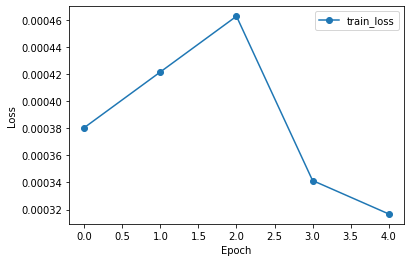

In [ ]:
epochs=5
model = AE()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3,weight_decay=1e-5)
gpu_boole = torch.cuda.is_available()

if gpu_boole:
    model.cuda()
train_loss = []
for epoch in range(epochs):
    total_loss=0
    total_loss_=0
    loss_test=0
    loss_sum = 0
    loss_=0
    loss_train=0
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))
        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
        labels=labels.view(-1,1)
        labels=labels.unsqueeze(1)
        labels=labels.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())
    total_loss += loss.data
    loss_train=total_loss/size
    train_loss.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)
        
torch.save(model.state_dict(), './AE.pth')
# Plot train loss
plt.plot(train_loss, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG setting

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset1= Loader_unif_sampling1(path1=source_1, path2=source_2, path3=source_3, transform=img_transform)
  train_loader1= torch.utils.data.DataLoader(dataset=train_dataset1, batch_size=32, shuffle=True, num_workers=0)
  test_dataset1 = Loader_validation1(path=source_4, transform=img_transform)
  test_loader1 = torch.utils.data.DataLoader(dataset=test_dataset1, batch_size=32, shuffle=True, num_workers=0)

## test

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]


EPOCH 1 of 50

0 :  1.740705132484436
10 :  1.414927363395691
20 :  1.4284648895263672
30 :  1.3007458448410034
40 :  1.235412359237671
50 :  1.4021763801574707
60 :  1.3537276983261108
70 :  1.4132612943649292
80 :  1.3435792922973633
90 :  1.3903312683105469
100 :  1.3513025045394897
Train loss: 0.000458
Test accuracy:  0.38147470355033875

EPOCH 2 of 50

0 :  1.3837414979934692
10 :  1.4665485620498657
20 :  1.3560913801193237
30 :  1.2987315654754639
40 :  1.3920310735702515
50 :  1.447878360748291
60 :  1.3519515991210938
70 :  1.207327961921692
80 :  1.4184199571609497
90 :  1.3294836282730103
100 :  1.4427818059921265
Train loss: 0.000569
Test accuracy:  0.38513100147247314

EPOCH 3 of 50

0 :  1.6276823282241821
10 :  1.3174448013305664
20 :  1.3254507780075073
30 :  1.3739104270935059
40 :  1.31797194480896
50 :  1.4159094095230103
60 :  1.359620451927185
70 :  1.311348795890808
80 :  1.4615041017532349
90 :  1.3908624649047852
100 :  1.484554409980774
Train loss: 0.000692
Te

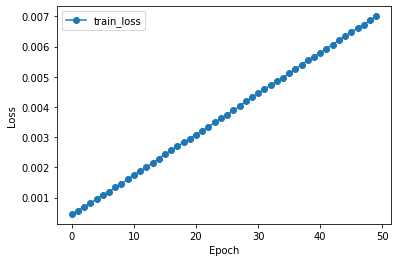

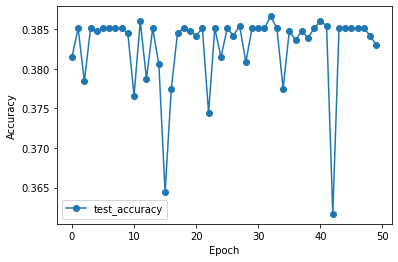

In [ ]:
learning_rate = 0.01

model_vgg = vgg16(pretrained=True) 
for param in model_vgg.parameters():
    param.requires_grad = False 
    model_vgg.classifier[6] = nn.Linear(4096, 5)

if torch.cuda.is_available():
    model_vgg.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg.parameters(), lr=learning_rate)

epochs = 50
train_loss_vgg=[]
test_accuracy_vgg=[]
train_accuracy_vgg=[]
for epoch in range(epochs):
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader1):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))

        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
          
        optimizer.zero_grad()
        outputs = model_vgg(model(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())

    total_loss += loss.data
    loss_train=total_loss/size
    train_loss_vgg.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)
    
    test_accuracy = 0 
    for i, (test_inputs, test_labels) in enumerate(test_loader1):
        if torch.cuda.is_available():
          test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()
        test_output= model_vgg(model(test_inputs))
        _ ,test_output = torch.max(test_output, 1)
        test_accuracy += torch.sum(test_output == test_labels)
    test_accuracy = test_accuracy / len(test_loader1.dataset)
    test_accuracy_vgg.append(test_accuracy.cpu())
    print("Test accuracy: ", test_accuracy.item())
 
# Plot train loss
plt.plot(train_loss_vgg, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot test accuracy
plt.plot(test_accuracy_vgg, '-o', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test on PASCAL

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset= Loader_unif_sampling(path1=source_1, path2=source_2, path3=source_4, transform=img_transform)
  train_loader= torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)
  test_dataset = Loader_validation(path=source_3, transform=img_transform)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)

## Train AE


EPOCH 1 of 5



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([96, 1, 1, 1])) that is different to the input size (torch.Size([96, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 :  7.7964606285095215
10 :  9.275652885437012
20 :  5.3371901512146
30 :  4.591007709503174
40 :  4.606360912322998
50 :  4.115796089172363
60 :  3.5113399028778076
70 :  4.4587626457214355
80 :  4.240740776062012
90 :  5.115162372589111
100 :  4.010738372802734


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([54, 1, 1, 1])) that is different to the input size (torch.Size([54, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train loss: 0.000344

EPOCH 2 of 5

0 :  3.8961894512176514
10 :  4.719427585601807
20 :  4.781740665435791
30 :  4.843764305114746
40 :  4.020885467529297
50 :  3.5208969116210938
60 :  5.020893573760986
70 :  4.802125453948975
80 :  4.614626407623291
90 :  3.1354594230651855
100 :  4.229184150695801
Train loss: 0.000359

EPOCH 3 of 5

0 :  3.7709128856658936
10 :  4.322941303253174
20 :  4.104153633117676
30 :  4.822976589202881
40 :  4.843761444091797
50 :  4.093799591064453
60 :  3.95835018157959
70 :  4.39586067199707
80 :  3.895846128463745
90 :  4.9791741371154785
100 :  3.8645925521850586
Train loss: 0.000451

EPOCH 4 of 5

0 :  4.3125224113464355
10 :  4.166685104370117
20 :  4.270863056182861
30 :  3.697925567626953
40 :  4.083352565765381
50 :  4.635444164276123
60 :  4.28126859664917
70 :  3.7292208671569824
80 :  3.708346366882324
90 :  3.625018835067749
100 :  4.770883560180664
Train loss: 0.000352

EPOCH 5 of 5

0 :  3.4479198455810547
10 :  3.7396018505096436
20 :  4.57

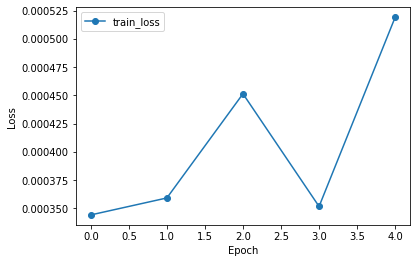

In [ ]:
epochs=5
model = AE()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3,weight_decay=1e-5)
gpu_boole = torch.cuda.is_available()

if gpu_boole:
    model.cuda()
train_loss = []
for epoch in range(epochs):
    total_loss=0
    total_loss_=0
    loss_test=0
    loss_sum = 0
    loss_=0
    loss_train=0
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))
        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
        labels=labels.view(-1,1)
        labels=labels.unsqueeze(1)
        labels=labels.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())
    total_loss += loss.data
    loss_train=total_loss/size#labels.size(0)
    train_loss.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)

torch.save(model.state_dict(), './AE.pth')
# Plot train loss
plt.plot(train_loss, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG setting

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset1= Loader_unif_sampling1(path1=source_1, path2=source_2, path3=source_4, transform=img_transform)
  train_loader1= torch.utils.data.DataLoader(dataset=train_dataset1, batch_size=32, shuffle=True, num_workers=0)
  test_dataset1 = Loader_validation1(path=source_3, transform=img_transform)
  test_loader1 = torch.utils.data.DataLoader(dataset=test_dataset1, batch_size=32, shuffle=True, num_workers=0)

## test


EPOCH 1 of 50

0 :  1.6872048377990723
10 :  1.2370201349258423
20 :  1.3283580541610718
30 :  1.432498574256897
40 :  1.3075402975082397
50 :  1.3715415000915527
60 :  1.3099033832550049
70 :  1.3046914339065552
80 :  1.351707100868225
90 :  1.2758281230926514
100 :  1.29668390750885
Train loss: 0.000657
Test accuracy:  0.43039101362228394

EPOCH 2 of 50

0 :  1.3323067426681519
10 :  1.259199857711792
20 :  1.3354525566101074
30 :  1.2863329648971558
40 :  1.349960446357727
50 :  1.3595285415649414
60 :  1.3038533926010132
70 :  1.1931018829345703
80 :  1.4150652885437012
90 :  1.4127479791641235
100 :  1.333925724029541
Train loss: 0.000794
Test accuracy:  0.3492298722267151

EPOCH 3 of 50

0 :  1.2847365140914917
10 :  1.274180293083191
20 :  1.2933269739151
30 :  1.2877341508865356
40 :  1.3552165031433105
50 :  1.3240333795547485
60 :  1.2099889516830444
70 :  1.3102577924728394
80 :  1.31765878200531
90 :  1.2325752973556519
100 :  1.3575490713119507
Train loss: 0.000926
Test a

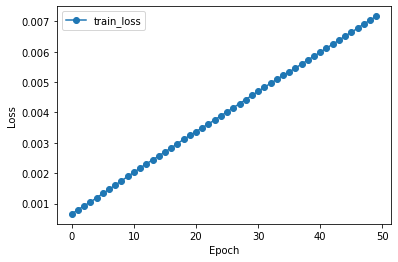

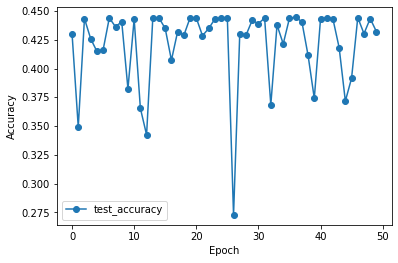

In [ ]:
learning_rate = 0.01

model_vgg = vgg16(pretrained=True) 
for param in model_vgg.parameters():
    param.requires_grad = False 
    model_vgg.classifier[6] = nn.Linear(4096, 5)

if torch.cuda.is_available():
    model_vgg.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg.parameters(), lr=learning_rate)

epochs = 50
train_loss_vgg=[]
test_accuracy_vgg=[]
train_accuracy_vgg=[]
for epoch in range(epochs):
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader1):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))

        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
          
        optimizer.zero_grad()
        outputs = model_vgg(model(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())

    total_loss += loss.data
    loss_train=total_loss/size
    train_loss_vgg.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)
    
    test_accuracy = 0 
    for i, (test_inputs, test_labels) in enumerate(test_loader1):
        if torch.cuda.is_available():
          test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()
        test_output= model_vgg(model(test_inputs))
        _ ,test_output = torch.max(test_output, 1)
        test_accuracy += torch.sum(test_output == test_labels)
    test_accuracy = test_accuracy / len(test_loader1.dataset)
    test_accuracy_vgg.append(test_accuracy.cpu())
    print("Test accuracy: ", test_accuracy.item())
 
# Plot train loss
plt.plot(train_loss_vgg, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot test accuracy
plt.plot(test_accuracy_vgg, '-o', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test on LABELME

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset= Loader_unif_sampling(path1=source_1, path2=source_3, path3=source_4, transform=img_transform)
  train_loader= torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)
  test_dataset = Loader_validation(path=source_2, transform=img_transform)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)

## Train AE


EPOCH 1 of 5



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([96, 1, 1, 1])) that is different to the input size (torch.Size([96, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 :  7.491865158081055
10 :  8.394730567932129
20 :  7.455908298492432
30 :  4.852773189544678
40 :  5.304953575134277
50 :  5.13098669052124
60 :  4.773034572601318
70 :  3.8247532844543457
80 :  3.7610740661621094
90 :  4.479506492614746
100 :  4.3962554931640625


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([48, 1, 1, 1])) that is different to the input size (torch.Size([48, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train loss: 0.000413

EPOCH 2 of 5

0 :  5.083633899688721
10 :  3.645935535430908
20 :  4.073036193847656
30 :  4.895996570587158
40 :  4.802191734313965
50 :  4.572967052459717
60 :  4.843787670135498
70 :  4.781282901763916
80 :  4.760434150695801
90 :  3.8125381469726562
100 :  3.625013589859009
Train loss: 0.000623

EPOCH 3 of 5

0 :  4.552112102508545
10 :  5.385416030883789
20 :  4.510437488555908
30 :  4.343752861022949
40 :  4.156259059906006
50 :  4.6250152587890625
60 :  4.427090167999268
70 :  4.697927474975586
80 :  3.427104949951172
90 :  3.7916879653930664
100 :  5.197929859161377
Train loss: 0.000512

EPOCH 4 of 5

0 :  4.395843029022217
10 :  4.250002861022949
20 :  4.479175567626953
30 :  4.458343982696533
40 :  4.406256675720215
50 :  4.57291841506958
60 :  5.0312604904174805
70 :  4.812518119812012
80 :  3.8854246139526367
90 :  4.479170322418213
100 :  5.104174613952637
Train loss: 0.000296

EPOCH 5 of 5

0 :  4.6041789054870605
10 :  4.000002861022949
20 :  4.1875

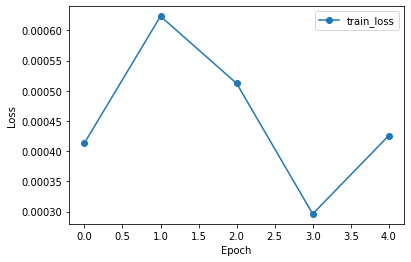

In [ ]:
epochs=5
model = AE()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3,weight_decay=1e-5)
gpu_boole = torch.cuda.is_available()

if gpu_boole:
    model.cuda()
train_loss = []
for epoch in range(epochs):
    total_loss=0
    total_loss_=0
    loss_test=0
    loss_sum = 0
    loss_=0
    loss_train=0
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))
        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
        labels=labels.view(-1,1)
        labels=labels.unsqueeze(1)
        labels=labels.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())
    total_loss += loss.data
    loss_train=total_loss/size#labels.size(0)
    train_loss.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)

torch.save(model.state_dict(), './AE.pth')
# Plot train loss
plt.plot(train_loss, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG setting

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset1= Loader_unif_sampling1(path1=source_1, path2=source_3, path3=source_4, transform=img_transform)
  train_loader1= torch.utils.data.DataLoader(dataset=train_dataset1, batch_size=32, shuffle=True, num_workers=0)
  test_dataset1 = Loader_validation1(path=source_2, transform=img_transform)
  test_loader1 = torch.utils.data.DataLoader(dataset=test_dataset1, batch_size=32, shuffle=True, num_workers=0)

## test


EPOCH 1 of 50

0 :  1.646687388420105
10 :  1.5193320512771606
20 :  1.4227250814437866
30 :  1.5576039552688599
40 :  1.4033832550048828
50 :  1.3769828081130981
60 :  1.413928508758545
70 :  1.4238299131393433
80 :  1.4563542604446411
90 :  1.3435786962509155
100 :  1.5174473524093628
Train loss: 0.000583
Test accuracy:  0.4807981848716736

EPOCH 2 of 50

0 :  1.4186829328536987
10 :  1.4155845642089844
20 :  1.400765299797058
30 :  1.4446016550064087
40 :  1.5354113578796387
50 :  1.548972725868225
60 :  1.4303258657455444
70 :  1.4959181547164917
80 :  1.4523935317993164
90 :  1.5979539155960083
100 :  1.427689552307129
Train loss: 0.000725
Test accuracy:  0.4657379388809204

EPOCH 3 of 50

0 :  1.3786143064498901
10 :  1.5351325273513794
20 :  1.3928331136703491
30 :  1.4212013483047485
40 :  1.409551978111267
50 :  1.629521369934082
60 :  1.4439154863357544
70 :  1.4337595701217651
80 :  1.4486865997314453
90 :  1.530708909034729
100 :  1.2458354234695435
Train loss: 0.000879
Te

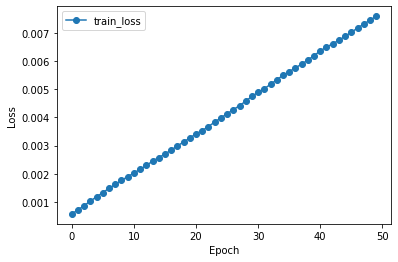

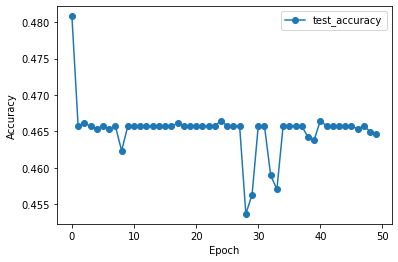

In [ ]:
learning_rate = 0.01

model_vgg = vgg16(pretrained=True) 
for param in model_vgg.parameters():
    param.requires_grad = False 
    model_vgg.classifier[6] = nn.Linear(4096, 5)

if torch.cuda.is_available():
    model_vgg.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg.parameters(), lr=learning_rate)

epochs = 50
train_loss_vgg=[]
test_accuracy_vgg=[]
train_accuracy_vgg=[]
for epoch in range(epochs):
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader1):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))

        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
          
        optimizer.zero_grad()
        outputs = model_vgg(model(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())

    total_loss += loss.data
    loss_train=total_loss/size
    train_loss_vgg.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)
    
    test_accuracy = 0 
    for i, (test_inputs, test_labels) in enumerate(test_loader1):
        if torch.cuda.is_available():
          test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()
        test_output= model_vgg(model(test_inputs))
        _ ,test_output = torch.max(test_output, 1)
        test_accuracy += torch.sum(test_output == test_labels)
    test_accuracy = test_accuracy / len(test_loader1.dataset)
    test_accuracy_vgg.append(test_accuracy.cpu())
    print("Test accuracy: ", test_accuracy.item())
 
# Plot train loss
plt.plot(train_loss_vgg, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot test accuracy
plt.plot(test_accuracy_vgg, '-o', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test on CALTECH

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset= Loader_unif_sampling(path1=source_2, path2=source_3, path3=source_4, transform=img_transform)
  train_loader= torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)
  test_dataset = Loader_validation(path=source_1, transform=img_transform)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)

## Train AE


EPOCH 1 of 5



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([96, 1, 1, 1])) that is different to the input size (torch.Size([96, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 :  6.384293079376221
10 :  8.019943237304688
20 :  5.80689001083374
30 :  4.239577770233154
40 :  4.4160237312316895
50 :  3.5539393424987793
60 :  3.657923460006714
70 :  4.354596138000488
80 :  3.6983542442321777
90 :  5.1357221603393555
100 :  3.822984457015991


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([48, 1, 1, 1])) that is different to the input size (torch.Size([48, 3, 213, 213])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train loss: 0.000399

EPOCH 2 of 5

0 :  3.645935297012329
10 :  5.135465621948242
20 :  4.520866870880127
30 :  3.2083592414855957
40 :  3.1354267597198486
50 :  4.468778133392334
60 :  3.739600658416748
70 :  3.760430335998535
80 :  4.437533855438232
90 :  3.281291961669922
100 :  3.1458396911621094
Train loss: 0.000416

EPOCH 3 of 5

0 :  5.343766212463379
10 :  3.4166715145111084
20 :  3.791706085205078
30 :  3.7083652019500732
40 :  4.677101135253906
50 :  3.197925329208374
60 :  3.2916860580444336
70 :  3.8020992279052734
80 :  5.05210018157959
90 :  2.7604193687438965
100 :  3.4687612056732178
Train loss: 0.000485

EPOCH 4 of 5

0 :  4.270852088928223
10 :  3.0520894527435303
20 :  4.302093505859375
30 :  4.156254768371582
40 :  3.3333380222320557
50 :  3.2708449363708496
60 :  3.479179620742798
70 :  4.072933673858643
80 :  3.3854258060455322
90 :  4.270847320556641
100 :  3.177091121673584
Train loss: 0.000378

EPOCH 5 of 5

0 :  3.5000159740448
10 :  3.0416722297668457
20 :  

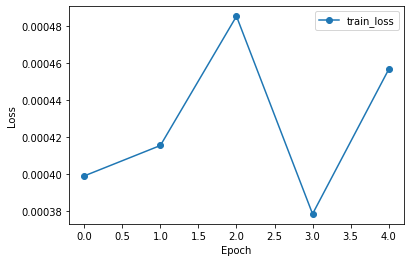

In [ ]:
epochs=5
model = AE()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3,weight_decay=1e-5)
gpu_boole = torch.cuda.is_available()

if gpu_boole:
    model.cuda()
train_loss = []
for epoch in range(epochs):
    total_loss=0
    total_loss_=0
    loss_test=0
    loss_sum = 0
    loss_=0
    loss_train=0
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))
        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
        labels=labels.view(-1,1)
        labels=labels.unsqueeze(1)
        labels=labels.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())
    total_loss += loss.data
    loss_train=total_loss/size#labels.size(0)
    train_loss.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)

torch.save(model.state_dict(), './AE.pth')
# Plot train loss
plt.plot(train_loss, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG setting

In [ ]:
if __name__ == '__main__':
  source_1 = '/content/gdrive/MyDrive/vlcs/CALTECH/full/'
  source_2 = '/content/gdrive/MyDrive/vlcs/LABELME/full/'
  source_3 = '/content/gdrive/MyDrive/vlcs/PASCAL/full/'
  source_4 = '/content/gdrive/MyDrive/vlcs/SUN/full/'
  img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.RandomHorizontalFlip(), transforms.ToTensor()])
  train_dataset1= Loader_unif_sampling1(path1=source_2, path2=source_3, path3=source_4, transform=img_transform)
  train_loader1= torch.utils.data.DataLoader(dataset=train_dataset1, batch_size=32, shuffle=True, num_workers=0)
  test_dataset1 = Loader_validation1(path=source_1, transform=img_transform)
  test_loader1 = torch.utils.data.DataLoader(dataset=test_dataset1, batch_size=32, shuffle=True, num_workers=0)

## test


EPOCH 1 of 50

0 :  1.559471607208252
10 :  1.2584881782531738
20 :  1.4510685205459595
30 :  1.1808358430862427
40 :  1.4348183870315552
50 :  1.3820875883102417
60 :  1.3156232833862305
70 :  1.2880710363388062
80 :  1.3735113143920898
90 :  1.4267085790634155
100 :  1.2370558977127075
Train loss: 0.000591
Test accuracy:  0.5585585236549377

EPOCH 2 of 50

0 :  1.334458827972412
10 :  1.3440027236938477
20 :  1.2024441957473755
30 :  1.5065277814865112
40 :  1.1793267726898193
50 :  1.349587082862854
60 :  1.4444276094436646
70 :  1.4070920944213867
80 :  1.2851961851119995
90 :  1.379652500152588
100 :  1.3886150121688843
Train loss: 0.000731
Test accuracy:  0.6056826114654541

EPOCH 3 of 50

0 :  1.2527791261672974
10 :  1.3488287925720215
20 :  1.2955538034439087
30 :  1.31147301197052
40 :  1.3510308265686035
50 :  1.2002464532852173
60 :  1.3926078081130981
70 :  1.3896595239639282
80 :  1.2615728378295898
90 :  1.3923166990280151
100 :  1.4531865119934082
Train loss: 0.000851


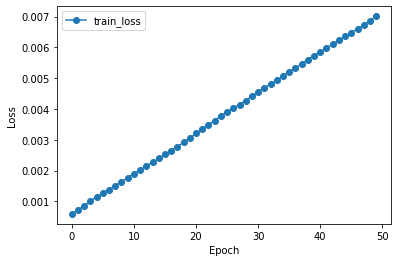

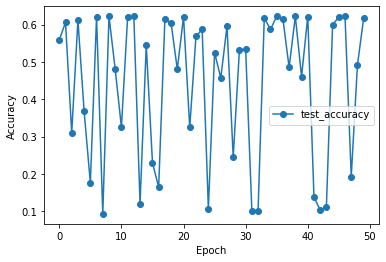

In [ ]:
learning_rate = 0.01

model_vgg = vgg16(pretrained=True) 
for param in model_vgg.parameters():
    param.requires_grad = False 
    model_vgg.classifier[6] = nn.Linear(4096, 5)

if torch.cuda.is_available():
    model_vgg.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg.parameters(), lr=learning_rate)

epochs = 50
train_loss_vgg=[]
test_accuracy_vgg=[]
train_accuracy_vgg=[]
for epoch in range(epochs):
    print("\nEPOCH " + str(epoch + 1) + " of " + str(epochs) + "\n")
    size=0
    for i, (inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader1):
        size+=(labels1.size(0)+labels2.size(0)+labels3.size(0))

        inputs=torch.cat((inputs1,inputs2,inputs3),0)
        labels=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
          
        optimizer.zero_grad()
        outputs = model_vgg(model(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, ": ", loss.item())

    total_loss += loss.data
    loss_train=total_loss/size
    train_loss_vgg.append(loss_train.cpu())
    print('Train loss: %f' % loss_train)
    
    test_accuracy = 0 
    for i, (test_inputs, test_labels) in enumerate(test_loader1):
        if torch.cuda.is_available():
          test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()
        test_output= model_vgg(model(test_inputs))
        _ ,test_output = torch.max(test_output, 1)
        test_accuracy += torch.sum(test_output == test_labels)
    test_accuracy = test_accuracy / len(test_loader1.dataset)
    test_accuracy_vgg.append(test_accuracy.cpu())
    print("Test accuracy: ", test_accuracy.item())
 
# Plot train loss
plt.plot(train_loss_vgg, '-o', label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot test accuracy
plt.plot(test_accuracy_vgg, '-o', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()